<a href="https://colab.research.google.com/github/ykro/ML-SP1-2021/blob/main/Lesson-01/L1N9_LogReg_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

#dark theme
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

In [ ]:
n = 100
half = n//2
dimen = 2
offset = 5

X = np.random.rand(n, dimen)*offset
X[:half, :] = X[:half, :] - offset*np.ones((half, dimen))
X[half:, :] = X[half:, :] + offset*np.ones((half, dimen))

X = np.around(X, decimals=2)
print(X)

[[-4.04 -1.89]
 [-2.81 -1.07]
 [-1.1  -3.64]
 [-3.62 -0.99]
 [-0.21 -0.62]
 [-3.21 -2.5 ]
 [-1.58 -1.44]
 [-3.15 -2.19]
 [-2.48 -4.93]
 [-1.14 -0.59]
 [-3.18 -1.92]
 [-4.62 -3.16]
 [-0.33 -1.74]
 [-3.01 -1.06]
 [-3.42 -2.16]
 [-0.65 -2.82]
 [-0.99 -4.28]
 [-1.48 -1.48]
 [-3.91 -0.38]
 [-2.79 -0.45]
 [-4.7  -4.08]
 [-4.76 -1.63]
 [-2.03 -2.33]
 [-4.78 -2.19]
 [-3.35 -2.49]
 [-4.44 -1.96]
 [-2.17 -4.97]
 [-1.91 -0.44]
 [-1.05 -0.04]
 [-0.21 -1.04]
 [-3.57 -1.88]
 [-2.61 -4.02]
 [-3.09 -4.73]
 [-2.74 -0.09]
 [-4.38 -4.4 ]
 [-1.31 -2.06]
 [-2.64 -4.46]
 [-3.85 -0.5 ]
 [-2.92 -2.32]
 [-4.97 -3.5 ]
 [-2.82 -1.94]
 [-0.41 -1.87]
 [-1.47 -4.25]
 [-1.27 -0.84]
 [-1.83 -2.81]
 [-4.24 -2.16]
 [-2.36 -0.24]
 [-2.6  -2.49]
 [-2.32 -0.9 ]
 [-4.71 -1.65]
 [ 8.84  8.54]
 [ 8.98  7.79]
 [ 9.83  5.74]
 [ 5.15  7.97]
 [ 5.57  9.75]
 [ 6.63  5.97]
 [ 7.29  9.6 ]
 [ 9.4   6.26]
 [ 6.74  5.91]
 [ 9.51  8.53]
 [ 8.63  9.5 ]
 [ 8.9   8.  ]
 [ 6.46  5.76]
 [ 6.68  8.29]
 [ 5.37  5.28]
 [ 6.62  7.95]
 [ 9.27  6

In [ ]:
Y = np.array([0]*half + [1]*half)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


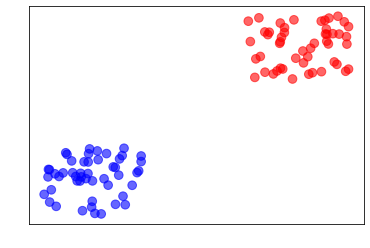

In [ ]:
colors = np.array(['blue','red'])
plt.scatter(X[:,0], X[:,1], c=colors[Y], s=75, alpha=0.6)

In [ ]:
model = Sequential([
  Dense(units=1, 
        input_dim=dimen, 
        activation='sigmoid')
])

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy'
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 500
history = model.fit(X, Y, epochs=epochs)

Epoch 1/500
4/4 [==============================] - 1s 3ms/step - loss: 1.3763
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5594
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3547
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2238
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2050
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1569
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1538
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1520
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1304
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

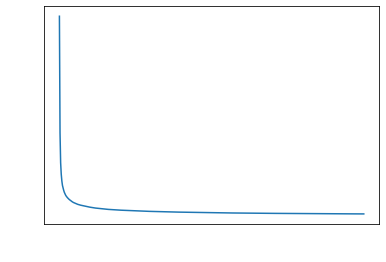

In [ ]:
plt.plot(range(epochs), history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

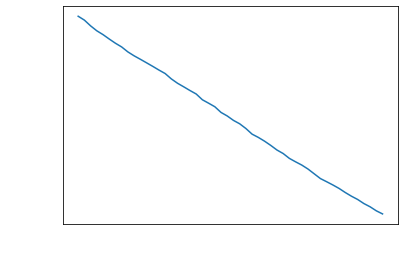

In [ ]:
zoom = 50
plt.plot(range(zoom), history.history['loss'][epochs-zoom:])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
blue = tf.expand_dims([-4,-4], axis = 0)
red = tf.expand_dims([8,8], axis = 0)

blue

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[-4, -4]], dtype=int32)>

In [ ]:
pred1 = np.rint(model.predict(blue)).astype('int32').squeeze()
pred2 = np.rint(model.predict(red)).astype('int32').squeeze()

print(f'should be blue, model predicts {colors[pred1]}')
print(f'should be red, model predicts {colors[pred2]}')

should be blue, model predicts blue
should be red, model predicts red


In [ ]:
red2 = tf.expand_dims([2,2], axis = 0)
pred3 = np.rint(model.predict(red2)).astype('int32').squeeze()
print(f'should be red, model predicts {colors[pred3]}')

should be red, model predicts red


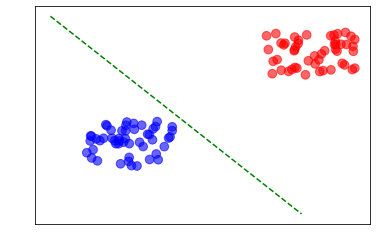

In [ ]:
plt.scatter(X[:,0], X[:,1], c=colors[Y], s=75, alpha=0.6)

weights = model.weights
w0 = weights[0].numpy()[0]
w1 = weights[0].numpy()[1]
b = weights[1].numpy()[0]

x_axis = np.linspace(-7, 7, 10)
y_axis = -(b + x_axis*w0)/w1 
plt.plot(x_axis, y_axis,'g--')
plt.show()